In [68]:
import pandas as pd
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [4]:
df = pd.read_csv(r"C:\Users\saad1\Documents\Python_Time_Series\Time_Series_Files\Time Series Analysis\Exponential Smoothing and Holt Winters\weekly_customer_complaints.csv", index_col='week', parse_dates=True)

In [5]:
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [6]:
df.rename(columns={'complaints':'y'},inplace=True)

In [7]:
df.head()

,y,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [13]:
df['y'] = df['y'].str.replace(',','').astype(int)

In [14]:
df.head()

,y,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750,37.26%,1,0,0
2018-01-08,1701,35.38%,0,0,0
2018-01-15,1711,36.22%,1,0,0
2018-01-22,1443,38.33%,1,0,0
2018-01-29,1397,36.34%,0,0,0


In [18]:
df.shape

(261, 5)

In [19]:
df.tail()

,y,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2022-11-28,4444,29.89%,0,1,0
2022-12-05,4920,28.48%,1,0,0
2022-12-12,5342,28.89%,0,0,0
2022-12-19,3868,33.26%,0,0,0
2022-12-26,3607,37.35%,0,1,0


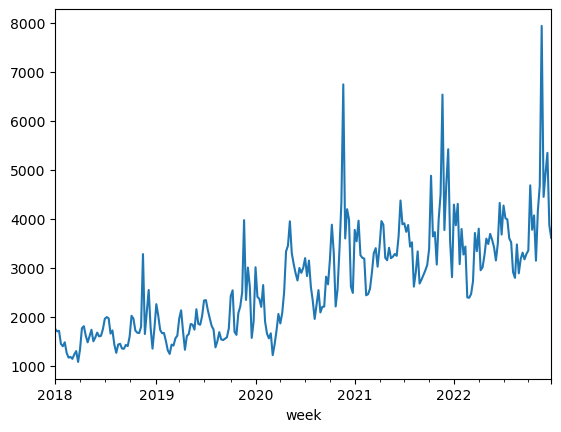

In [17]:
df['y'].plot()
plt.show()


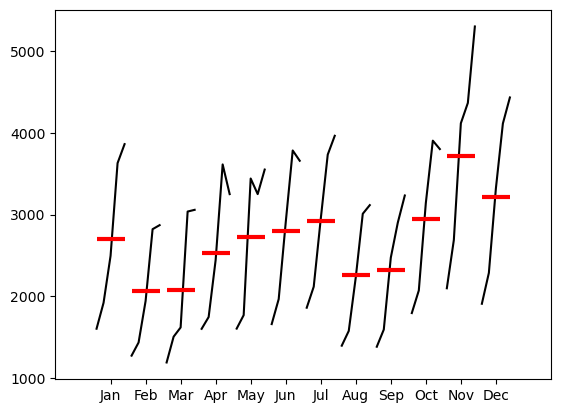

In [21]:
month_plot(df['y'].resample('ME').mean())
plt.show()

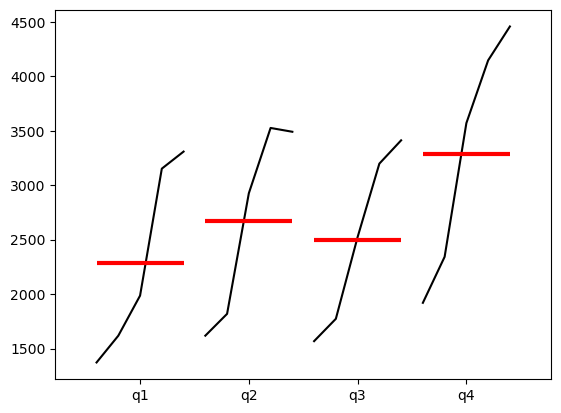

In [22]:
quarter_plot(df['y'].resample('QE').mean())
plt.show()

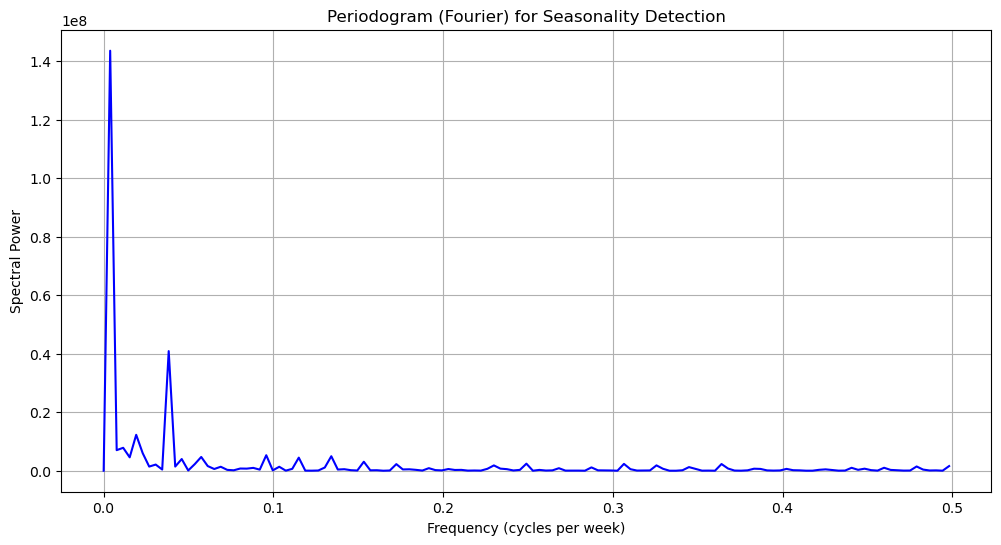

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Suppose df['value'] is your weekly data
# Sampling frequency is 1 observation per week
freqs, power = periodogram(df['y'], fs=1)  # fs=1 means 1 observation per week

# Plot Periodogram
plt.figure(figsize=(12,6))
plt.plot(freqs, power, 'b-')
plt.title('Periodogram (Fourier) for Seasonality Detection')
plt.xlabel('Frequency (cycles per week)')
plt.ylabel('Spectral Power')
plt.grid(True)
plt.show()


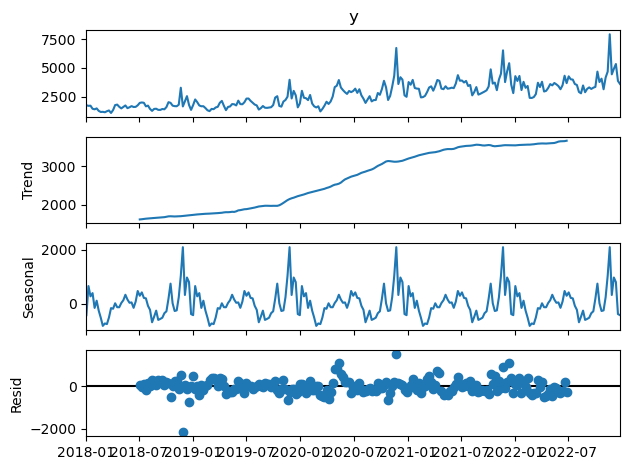

In [27]:
seasonal_decompose(df['y'], model = 'additive' , period=52).plot()
plt.show()

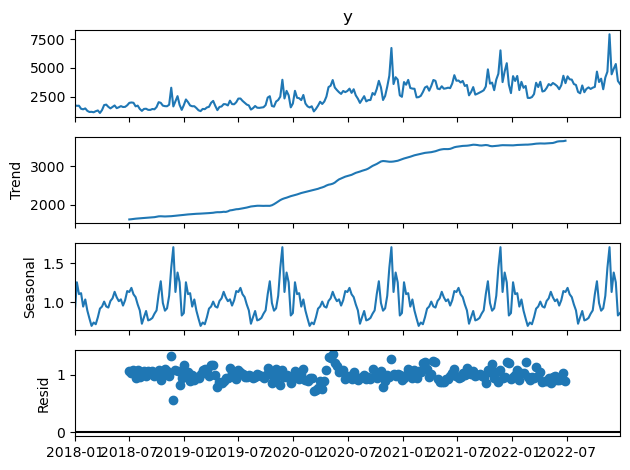

In [28]:
seasonal_decompose(df['y'], model = 'multiplicative' , period=52).plot()
plt.show()

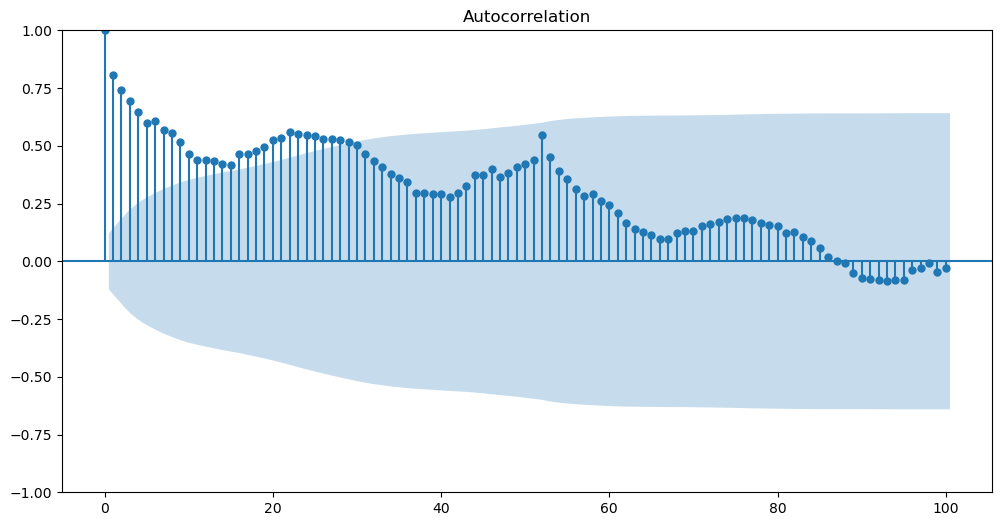

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
plot_acf(df['y'], lags=100, ax=ax)
plt.show()

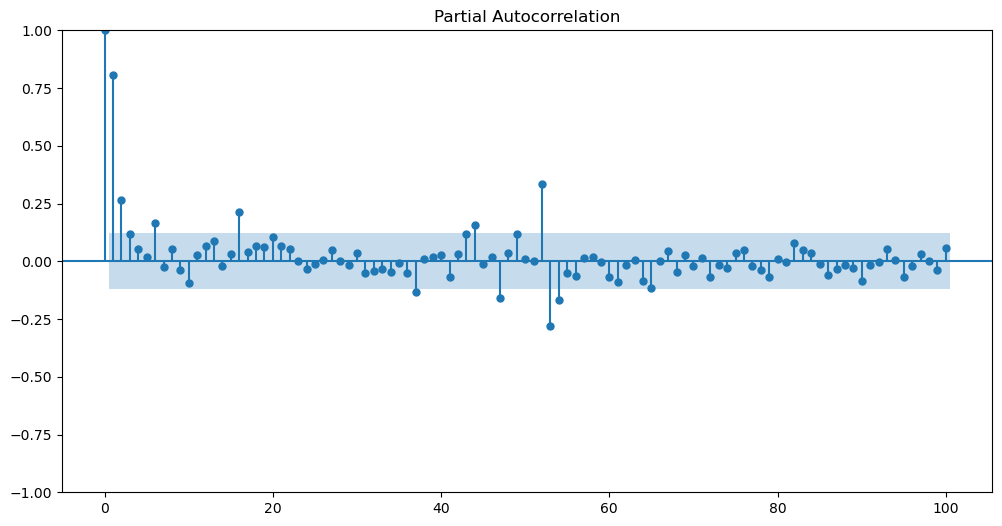

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
plot_pacf(df['y'], lags=100, ax=ax)
plt.show()

In [31]:
df = df.asfreq('W-Mon')

In [32]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq='W-MON')

In [35]:
periods = 13
train = df[:-periods].y
test = df[-periods:].y


In [36]:
train

week
2018-01-01    1750
2018-01-08    1701
2018-01-15    1711
2018-01-22    1443
2018-01-29    1397
              ... 
2022-08-29    2885
2022-09-05    3177
2022-09-12    3306
2022-09-19    3170
2022-09-26    3279
Freq: W-MON, Name: y, Length: 248, dtype: int32

In [42]:
ses_model = SimpleExpSmoothing(train).fit()
ses_model.summary()

Dep. Variable:,y,No. Observations:,248
Model:,SimpleExpSmoothing,SSE,74355478.081
Optimized:,True,AIC,3131.513
Trend:,None,BIC,3138.540
Seasonal:,None,AICC,3131.678
Seasonal Periods:,None,Date:,"Sat, 12 Apr 2025"
Box-Cox:,False,Time:,22:54:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5097818,alpha,True
initial_level,1750.0000,l.0,False


In [41]:
train

week
2018-01-01    1750
2018-01-08    1701
2018-01-15    1711
2018-01-22    1443
2018-01-29    1397
              ... 
2022-08-29    2885
2022-09-05    3177
2022-09-12    3306
2022-09-19    3170
2022-09-26    3279
Freq: W-MON, Name: y, Length: 248, dtype: int32

In [44]:
ses_fct = ses_model.forecast(periods)
ses_fct

2022-10-03    3236.663468
2022-10-10    3236.663468
2022-10-17    3236.663468
2022-10-24    3236.663468
2022-10-31    3236.663468
2022-11-07    3236.663468
2022-11-14    3236.663468
2022-11-21    3236.663468
2022-11-28    3236.663468
2022-12-05    3236.663468
2022-12-12    3236.663468
2022-12-19    3236.663468
2022-12-26    3236.663468
Freq: W-MON, dtype: float64

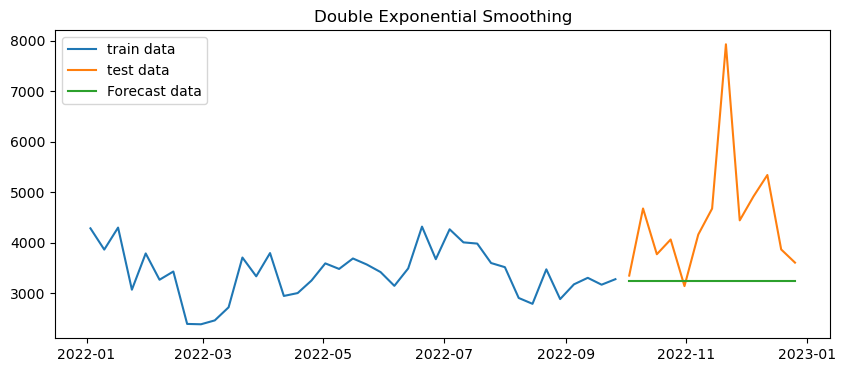

In [60]:
plt.figure(figsize=(10,4))

plt.plot(train.loc['2022'], label='train data')
plt.plot(test, label = 'test data' )
plt.plot(ses_fct, label = 'Forecast data')

plt.title("Double Exponential Smoothing")
plt.legend()
plt.show()

In [56]:
des_model = ExponentialSmoothing(train,
                                 trend = 'add',
                                 seasonal = None).fit()
des_model.summary()

Dep. Variable:,y,No. Observations:,248
Model:,ExponentialSmoothing,SSE,75700134.636
Optimized:,True,AIC,3139.958
Trend:,Additive,BIC,3154.011
Seasonal:,None,AICC,3140.306
Seasonal Periods:,None,Date:,"Sun, 13 Apr 2025"
Box-Cox:,False,Time:,10:27:12
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5212798,alpha,True
smoothing_trend,0.0190235,beta,True


In [57]:
des_fct = des_model.forecast(periods)
des_fct

2022-10-03    3234.056074
2022-10-10    3232.618393
2022-10-17    3231.180713
2022-10-24    3229.743033
2022-10-31    3228.305352
2022-11-07    3226.867672
2022-11-14    3225.429992
2022-11-21    3223.992311
2022-11-28    3222.554631
2022-12-05    3221.116951
2022-12-12    3219.679270
2022-12-19    3218.241590
2022-12-26    3216.803910
Freq: W-MON, dtype: float64

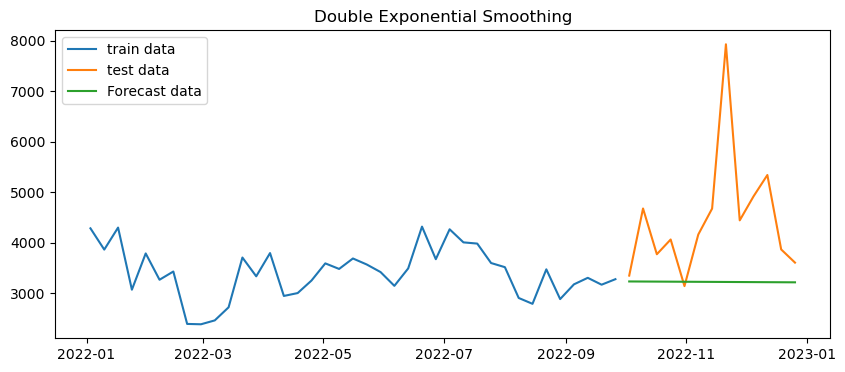

In [59]:
plt.figure(figsize=(10,4))

plt.plot(train.loc['2022'], label='train data')
plt.plot(test, label = 'test data' )
plt.plot(des_fct, label = 'Forecast data')

plt.title("Double Exponential Smoothing")
plt.legend()
plt.show()

In [66]:
tes_model = ExponentialSmoothing(train,
                                 trend = 'add',
                                 seasonal = 'mul',
                                 seasonal_periods = 52).fit()
tes_model.summary()

Dep. Variable:,y,No. Observations:,248
Model:,ExponentialSmoothing,SSE,22011939.885
Optimized:,True,AIC,2937.629
Trend:,Additive,BIC,3134.381
Seasonal:,Multiplicative,AICC,2973.841
Seasonal Periods:,52,Date:,"Sun, 13 Apr 2025"
Box-Cox:,False,Time:,10:52:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2171407,alpha,True
smoothing_trend,0.0001022,beta,True


In [63]:
tes_fct = tes_model.forecast(periods)
tes_fct

2022-10-03    4037.597666
2022-10-10    5061.034834
2022-10-17    3930.188090
2022-10-24    3546.547119
2022-10-31    3436.500943
2022-11-07    4258.645605
2022-11-14    5356.411134
2022-11-21    7309.878956
2022-11-28    4346.514058
2022-12-05    5312.702805
2022-12-12    5305.999532
2022-12-19    3458.660148
2022-12-26    3290.354134
Freq: W-MON, dtype: float64

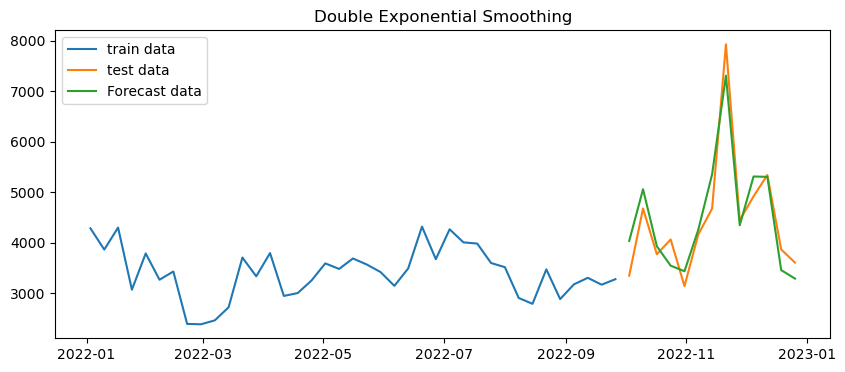

In [67]:
plt.figure(figsize=(10,4))

plt.plot(train.loc['2022'], label='train data')
plt.plot(test, label = 'test data' )
plt.plot(tes_fct, label = 'Forecast data')

plt.title("Double Exponential Smoothing")
plt.legend()
plt.show()

In [69]:
rmse = root_mean_squared_error(test, tes_fct)
mae = mean_absolute_error(test, tes_fct)
mape = mean_absolute_percentage_error(test,tes_fct)
rmse, mae, mape

(419.5382848736709, 360.54824085389896, 0.08448098810652326)

In [ ]:
def model_assessment(train,test, predictions, chart_title=None):
    plt.figure(figsize=(10,4))

    plt.plot(train, label='train data')
    plt.plot(test, label = 'test data' )
    plt.plot(predictions, label = 'Forecast data')

    plt.title(chart_title)
    plt.legend()
    plt.show()

    rmse = root_mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    mape = mean_absolute_percentage_error(test,predictions)

    print(f"RMSE : {rmse:.0f} ")
    print(f"MAE : {mae:.0f} ")
    print(f"MAPE : {100*mape:.1f} %")




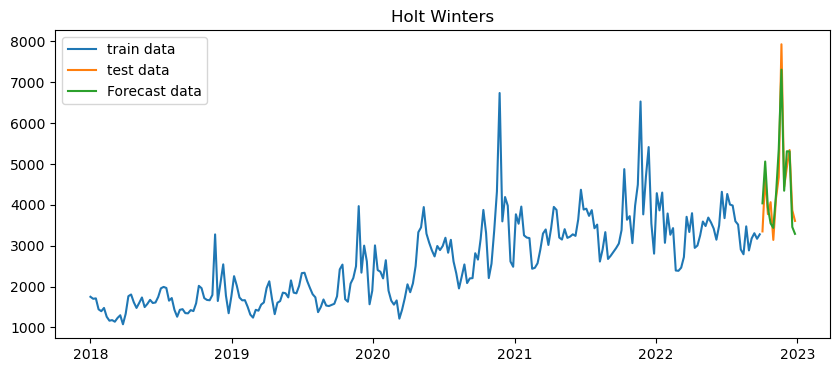

RMSE : 420 
MAE : 361 
MAPE : 8.4 


In [71]:
model_assessment(train,test,tes_fct,"Holt Winters")

## Predicting Future

In [73]:
tes_model_full = ExponentialSmoothing(df.y,
                                 trend = 'add',
                                 seasonal = 'mul',
                                 seasonal_periods = 52).fit()
#tes_model_full.summary()

In [74]:
forecast = tes_model_full.forecast(13)
forecast[:5]

2023-01-02    4837.697310
2023-01-09    4369.892032
2023-01-16    4578.729070
2023-01-23    3712.254227
2023-01-30    4132.256206
Freq: W-MON, dtype: float64

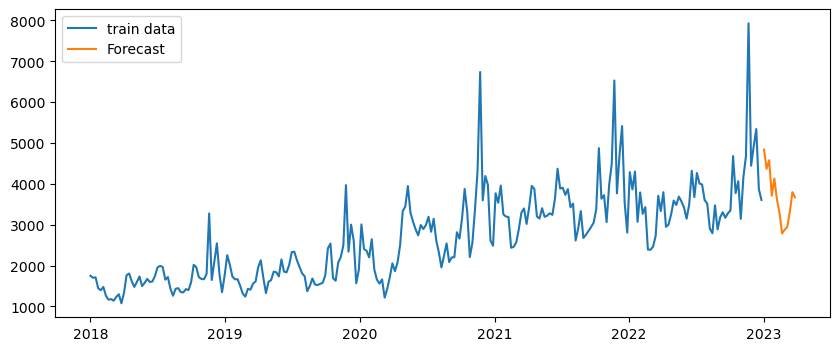

In [76]:
plt.figure(figsize=(10,4))

plt.plot(df.y, label='train data')
plt.plot(forecast, label = 'Forecast')

plt.legend()
plt.show()

In [84]:
def plot_future_predictions(y, forecast, chart_title=None):
    plt.figure(figsize=(10,4))
    plt.plot(y, label='train data')
    plt.plot(forecast, label = 'Forecast')
    plt.title(chart_title)
    plt.legend()
    plt.show()

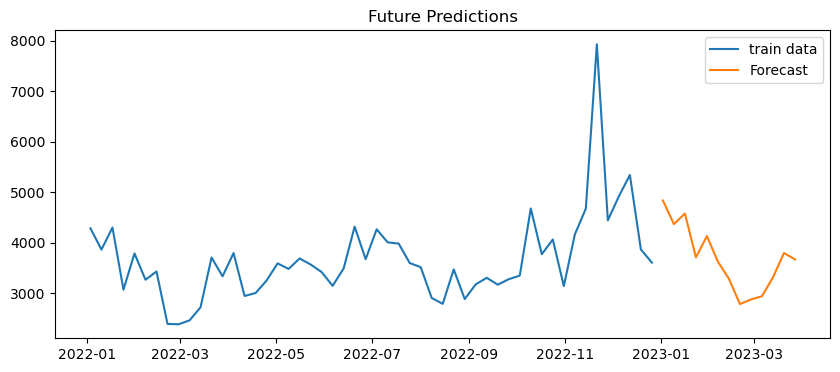

In [86]:
plot_future_predictions(df.y.loc['2022'],forecast, 'Future Predictions')

## Daily Data (Bitcoin)

In [90]:
df_bit = pd.read_csv(r"C:\Users\saad1\Documents\Python_Time_Series\Time_Series_Files\Time Series Analysis\Exponential Smoothing and Holt Winters\bitcoin_price.csv", index_col='Date',parse_dates=True)['Adj Close'].rename('y')
df_bit.head()

Date
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
Name: y, dtype: float64

In [91]:
df_bit = df_bit.asfreq('D')
df_bit.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq='D')

In [94]:
periods = 30
train = df_bit[:-periods]
test = df_bit[-periods:]



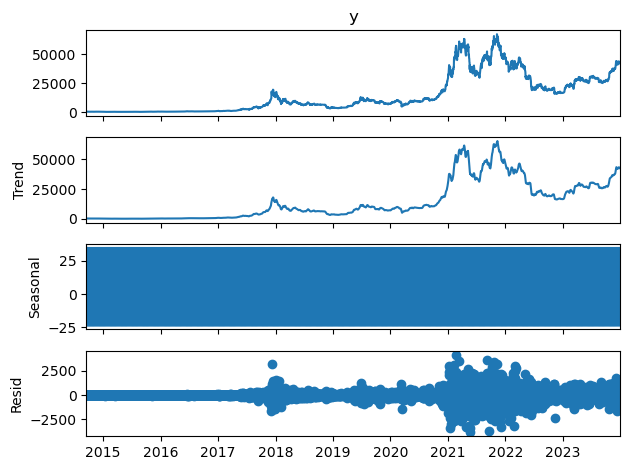

In [105]:
seasonal_decompose(df_bit, period=7).plot()
plt.show()

In [120]:
model_daily = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='mul',
    seasonal_periods=365
).fit()

c:\Users\saad1\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [124]:
#model_daily.summary()

In [122]:
daily_pred = model_daily.forecast(periods)
daily_pred

2023-12-01    37742.380375
2023-12-02    37773.718336
2023-12-03    38441.647619
2023-12-04    38392.702439
2023-12-05    40312.096645
2023-12-06    43985.090329
2023-12-07    44401.227329
2023-12-08    43437.353336
2023-12-09    43485.353777
2023-12-10    44339.711565
2023-12-11    45311.399794
2023-12-12    44845.725729
2023-12-13    44613.600670
2023-12-14    45225.874784
2023-12-15    46848.814462
2023-12-16    47792.419155
2023-12-17    48627.030027
2023-12-18    47170.035784
2023-12-19    46016.726970
2023-12-20    44711.415858
2023-12-21    43280.784494
2023-12-22    43575.925329
2023-12-23    43073.686661
2023-12-24    41885.314444
2023-12-25    43148.302194
2023-12-26    43582.434106
2023-12-27    43280.620018
2023-12-28    42678.542829
2023-12-29    41319.772477
2023-12-30    41615.290669
Freq: D, dtype: float64

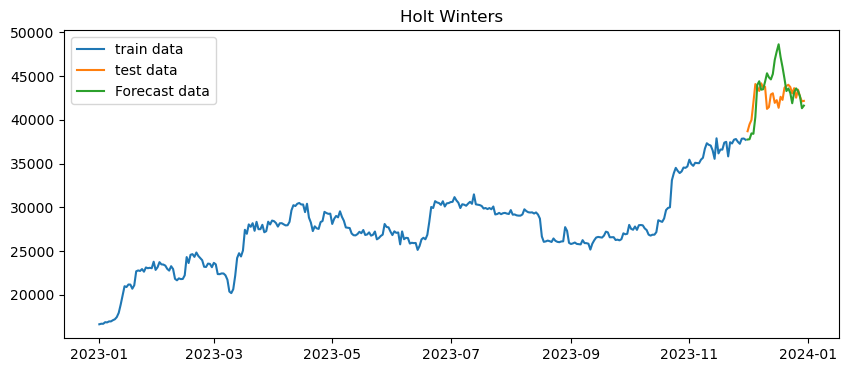

RMSE : 2704 
MAE : 1959 
MAPE : 4.7 


In [123]:
model_assessment(train.loc['2023'],test,daily_pred,"Holt Winters")